In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sb

In [224]:
df =  pd.read_csv('pesticides.csv')

In [225]:
df.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [226]:
df.sample(5)

,Domain,Area,Element,Item,Year,Unit,Value
1954,Pesticides Use,Israel,Use,Pesticides (total),1992,tonnes of active ingredients,2491.00
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
2281,Pesticides Use,Lesotho,Use,Pesticides (total),2001,tonnes of active ingredients,0.30
2986,Pesticides Use,Pakistan,Use,Pesticides (total),2005,tonnes of active ingredients,7914.31
4146,Pesticides Use,United States of America,Use,Pesticides (total),2007,tonnes of active ingredients,400068.14


#### Value is Amount of Pesticides

In [227]:
x = df['Year']
y = df['Value']

In [228]:
#outlier
Q1 = df["Value"].quantile(0.25)
Q3 = df["Value"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [229]:
upper_bound,lower_bound

(np.float64(19533.0), np.float64(-11571.0))

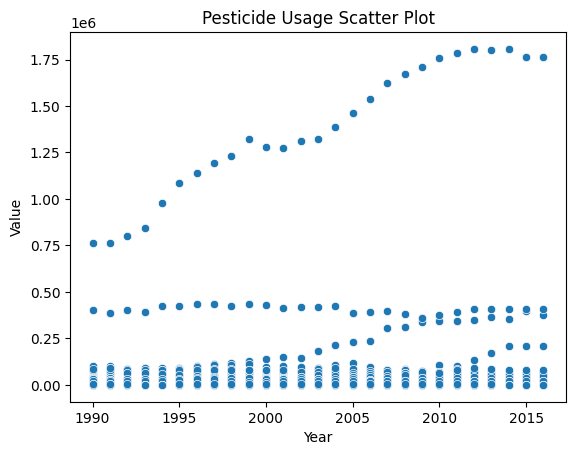

In [230]:
sb.scatterplot(data=df,x='Year',y='Value')
plt.title("Pesticide Usage Scatter Plot")
plt.show()

In [231]:
newdf = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]


In [232]:
from sklearn.model_selection import train_test_split

In [248]:
x = newdf[['Year']].values.reshape(-1,-1)
y  = newdf['Value']

ValueError: can only specify one unknown dimension

<Axes: xlabel='Year'>

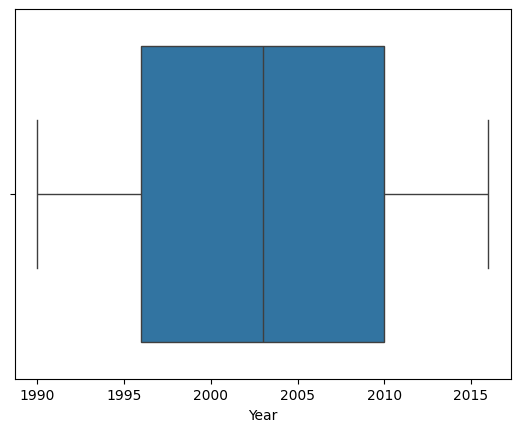

In [249]:
sb.boxplot(x="Year",data=newdf)

<Axes: xlabel='Value'>

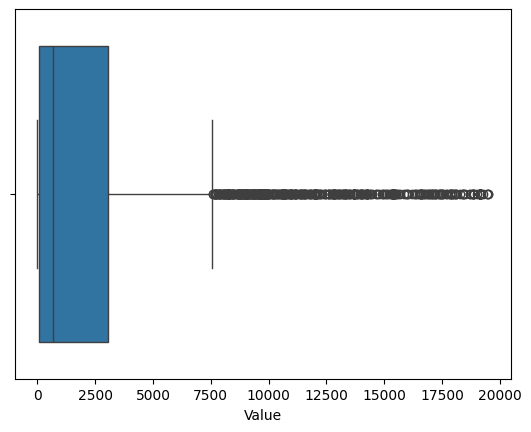

In [250]:

sb.boxplot(x="Value",data=newdf)


In [251]:
# log tranform for normal distritbution 
from sklearn.linear_model import LinearRegression


<Axes: xlabel='log_value'>

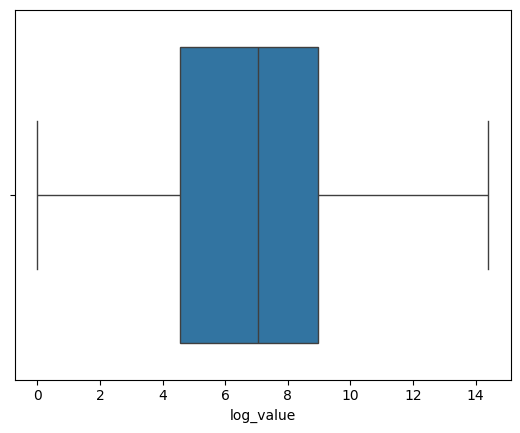

In [252]:
df["log_value"] = np.log1p(df["Value"])
sb.boxplot(x=df['log_value'])

In [253]:
df = df.dropna(subset=['Year','Value'])

In [254]:
y = df['Value']

In [255]:
x.shape,y.shape

((3734, 1), (4349,))

In [256]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [3734, 4349]

In [257]:
lr = LinearRegression()


In [ ]:
lr.fit(x_train,y_train)
ypred= lr.predict(x_test)

In [ ]:
from sklearn.metrics import  r2_score,mean_absolute_error,mean_squared_error

In [ ]:
print("R2 Score:", r2_score(y_test, ypred))
print("MAE:", mean_absolute_error(y_test, ypred))

R2 Score: 0.00018653001342150421
MAE: 32610.344330520285
